# Breast Cancer Prediction

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from tqdm import tqdm
import tensorflow_datasets as tfds

tf.get_logger().setLevel('ERROR')

In [2]:
import os
DATA_DIR = "/Users/shankar/dev/data/competitions/uci/breast-cancer-wisconsin/"
DATA_FILE = os.path.join(DATA_DIR, "breast_cancer.csv")

In [3]:
DATASET_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
data_file = tf.keras.utils.get_file(DATA_FILE, DATASET_URL)
col_names = ["id", "clump_thickness", "un_cell_size", "un_cell_shape", "marginal_adheshion", "single_eph_cell_size", "bare_nuclei", "bland_chromatin", "normal_nucleoli", "mitoses", "class"]
df = pd.read_csv(data_file, names=col_names, header=None)

In [4]:
df.head()

,id,clump_thickness,un_cell_size,un_cell_shape,marginal_adheshion,single_eph_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.pop("id")

0      1000025
1      1002945
2      1015425
3      1016277
4      1017023
5      1017122
6      1018099
7      1018561
8      1033078
9      1033078
10     1035283
11     1036172
12     1041801
13     1043999
14     1044572
15     1047630
16     1048672
17     1049815
18     1050670
19     1050718
20     1054590
21     1054593
22     1056784
23     1057013
24     1059552
25     1065726
26     1066373
27     1066979
28     1067444
29     1070935
        ...   
669    1350423
670    1352848
671    1353092
672    1354840
673    1354840
674    1355260
675    1365075
676    1365328
677    1368267
678    1368273
679    1368882
680    1369821
681    1371026
682    1371920
683     466906
684     466906
685     534555
686     536708
687     566346
688     603148
689     654546
690     654546
691     695091
692     714039
693     763235
694     776715
695     841769
696     888820
697     897471
698     897471
Name: id, Length: 699, dtype: int64

In [6]:
df = df[df["bare_nuclei"] != '?' ]
df.bare_nuclei = pd.to_numeric(df.bare_nuclei)

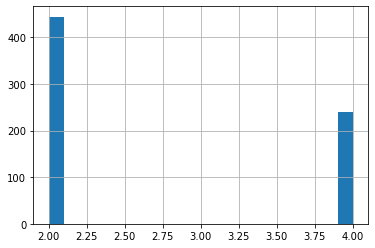

In [7]:
df['class'].hist(bins=20) 

In [8]:
df['class'] = np.where(df['class'] == 2, 0, 1)

In [9]:
train, test = train_test_split(df, test_size = 0.2)

In [10]:
train_stats = train.describe()
train_stats

,clump_thickness,un_cell_size,un_cell_shape,marginal_adheshion,single_eph_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,546.000000,546.000000,546.00000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,4.459707,3.150183,3.21978,2.836996,3.245421,3.571429,3.470696,2.796703,1.571429,0.351648
std,2.817251,3.049947,2.96265,2.893997,2.258973,3.649234,2.496247,3.002884,1.721805,0.477923
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.00000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.00000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.00000,4.000000,4.000000,6.000000,5.000000,3.000000,1.000000,1.000000
max,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [11]:
train_stats.pop('class')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
clump_thickness,546.0,4.459707,2.817251,1.0,2.0,4.0,6.0,10.0
un_cell_size,546.0,3.150183,3.049947,1.0,1.0,1.0,5.0,10.0
un_cell_shape,546.0,3.219780,2.962650,1.0,1.0,1.0,5.0,10.0
marginal_adheshion,546.0,2.836996,2.893997,1.0,1.0,1.0,4.0,10.0
single_eph_cell_size,546.0,3.245421,2.258973,1.0,2.0,2.0,4.0,10.0
bare_nuclei,546.0,3.571429,3.649234,1.0,1.0,1.0,6.0,10.0
bland_chromatin,546.0,3.470696,2.496247,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,546.0,2.796703,3.002884,1.0,1.0,1.0,3.0,10.0
mitoses,546.0,1.571429,1.721805,1.0,1.0,1.0,1.0,10.0


In [12]:
train_Y = train.pop("class")
test_Y = test.pop("class")

In [13]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [14]:
norm_train_X = norm(train)
norm_test_X = norm(test)

## Create Tensorflow Datasets

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (norm_train_X.values, train_Y.values)
)
test_dataset = tf.data.Dataset.from_tensor_slices(
    (norm_test_X.values, test_Y.values)
)

In [16]:
batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size=len(train)).batch(batch_size)
test_dataset = test_dataset.batch(batch_size=batch_size)

In [17]:
a = enumerate(train_dataset)
print(len(list(a)))

18


## Define the Model

In [18]:
def base_model():
    inputs = tf.keras.layers.Input(shape=(len(train.columns)))

    x = tf.keras.layers.Dense(128, activation='relu')(inputs)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

model = base_model()

In [19]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
loss_object = tf.keras.losses.BinaryCrossentropy()

## Evaluate Untrained Model

In [20]:
outputs = model(norm_test_X.values)
loss_value = loss_object(y_true=test_Y.values, y_pred=outputs)
print("Loss before training %.4f" % loss_value.numpy())

Loss before training 0.6673


In [21]:
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title(title)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

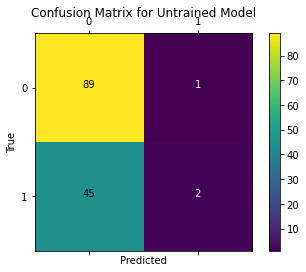

In [22]:
plot_confusion_matrix(test_Y.values, tf.round(outputs), title='Confusion Matrix for Untrained Model')

## Define Metrics

In [25]:
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        
        self.tp = tf.Variable(0, dtype='int32')
        self.fp = tf.Variable(0, dtype='int32')
        self.tn = tf.Variable(0, dtype='int32')
        self.fn = tf.Variable(0, dtype='int32')
        
    def update_state(self, y_true, y_pred, sample_weight=None):
        '''
        Accumulates statistics for the metric
        Args:
            y_true: target values from the test data
            y_pred: predicted values by the model
        '''
        
        # Calculate confusion matrix
        conf_matrix = tf.math.confusion_matrix(y_true, y_pred, num_classes=2)
        
        # Update values of the tp, fp, tn, fn from CM
        self.tn.assign_add(conf_matrix[0][0])
        self.tp.assign_add(conf_matrix[1][1])
        self.fp.assign_add(conf_matrix[0][1])
        self.fn.assign_add(conf_matrix[1][0])
        
    def result(self):
        '''
        Computes and returns the metric value tensor
        '''
        # Calculate precision
        if(self.tp + self.fp == 0):
            precision = 1.0
        else:
            precision = self.tp / (self.tp + self.fp)
            
        # Calculate recall
        if(self.tp + self.fn == 0):
            recall = 1.0
        else:
            recall = self.tp / (self.tp + self.fn)
            
        f1_score = 2 * ((precision * recall) / (precision + recall))
        
        return f1_score
    
    def reset_states(self):
        '''
        Resets all of the metric state variable
        '''
        self.tp.assign(0)
        self.fp.assign(0)
        self.tn.assign(0)
        self.fn.assign(0)

In [26]:
test_F1Score = F1Score()

test_F1Score.tp = tf.Variable(2, dtype = 'int32')
test_F1Score.fp = tf.Variable(5, dtype = 'int32')
test_F1Score.tn = tf.Variable(7, dtype = 'int32')
test_F1Score.fn = tf.Variable(9, dtype = 'int32')
test_F1Score.result()

<tf.Tensor: shape=(), dtype=float64, numpy=0.2222222222222222>

In [27]:
train_f1score_metric = F1Score()
val_f1score_metric = F1Score()

train_acc_metric = tf.keras.metrics.BinaryAccuracy()
val_acc_metric = tf.keras.metrics.BinaryAccuracy()

## Apply Gradients

In [30]:
def apply_gradient(optimizer, loss_object, model, x, y):
    '''
    Applies the gradients to the trainable model weights
    Args:
        No need for explanation
    '''
    with tf.GradientTape() as tape:
        logits = model(x)
        losses = loss_object(y_true=y, y_pred=logits)
        
    gradients = tape.gradient(losses, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    
    return logits, losses

In [32]:
test_logits, test_loss = apply_gradient(
    optimizer,
    loss_object,
    model,
    norm_test_X.values,
    test_Y.values
)

print(test_logits.numpy()[:8])
print(test_loss.numpy())

# del test_model
del test_logits
del test_loss

[[0.34756684]
 [0.4184211 ]
 [0.38896996]
 [0.42263734]
 [0.39868578]
 [0.31585667]
 [0.20463249]
 [0.40630797]]
0.6539125


## Training Loop

In [33]:
def train_data_for_one_epoch(
    train_dataset,
    optimizer,
    loss_object,
    model,
    train_acc_metric,
    train_f1score_metric,
    verbose=True
):
    '''
    Computes the loss then updates the weights and metrics for one epoch
    Args:
        train_acc_metric: Calculates how often predictions match labels
        train_f1score_metric: Custom metric we defined earlier
    '''
    losses = []
    
    # Iterate through all batches of training data
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        
        # Calculate loss and update trainable vaqriables using optimizer
        logits, loss_value = apply_gradient(
            optimizer, loss_object, model, x_batch_train, y_batch_train
        )
        losses.append(loss_value)
        
        # Round off logits to nearest integer and cast to integer for calculating metrics
        logits = tf.round(logits)
        logits = tf.cast(logits, 'int64')
        
        # Update the training metrics
        train_acc_metric.update_state(y_batch_train, logits)
        train_f1score_metric.update_state(y_batch_train, logits)
        
        if verbose:
            print("Training loss for step %s: %.4f" % (int(step), float(loss_value)))
            
    return losses

In [34]:
test_losses = train_data_for_one_epoch(train_dataset, optimizer, loss_object, model, 
                             train_acc_metric, train_f1score_metric, verbose=False)

for test_loss in test_losses:
    print(test_loss.numpy())

#del test_model
del test_losses

0.6159001
0.5056723
0.43774742
0.363636
0.34845504
0.2968843
0.26584196
0.2442089
0.18517306
0.27089033
0.1849632
0.1536413
0.16668254
0.12300046
0.20232785
0.20799217
0.10710657
0.090743475


In [37]:
def perform_validation():
    losses = []
    
    for x_val, y_val in test_dataset:
        
        # Calculate validation loss for current batch
        val_logits = model(x_val)
        val_loss = loss_object(y_true=y_val, y_pred=val_logits)
        losses.append(val_loss)
        
        # Round off and cast outputs to either or 1
        val_logits = tf.cast(tf.round(model(x_val)), 'int64')
        
        # Update validation metrics
        val_acc_metric.update_state(y_val, val_logits)
        val_f1score_metric.update_state(y_val, val_logits)
        
    return losses

In [38]:
epochs = 5
epochs_val_losses, epochs_train_losses = [], []

for epoch in range(epochs):
    print(f'Start of epoch {epoch}')
    losses_train = train_data_for_one_epoch(
        train_dataset, optimizer, loss_object, model, train_acc_metric, train_f1score_metric
    )
    
    # Get results from training metrics
    train_acc = train_acc_metric.result()
    train_f1score = train_f1score_metric.result()
    
    # Perform validation on all batches of test data
    losses_val = perform_validation()
    
    # Get results from validation metrics
    val_acc = val_acc_metric.result()
    val_f1score = val_f1score_metric.result()
    
    # Calculating training and validation losses for current epoch
    losses_train_mean = np.mean(losses_train)
    losses_val_mean = np.mean(losses_val)
    epochs_val_losses.append(losses_val_mean)
    epochs_train_losses.append(losses_train_mean)
    
    print('\n Epcoh %s: Train loss: %.4f  Validation Loss: %.4f, Train Accuracy: %.4f, Validation Accuracy %.4f, Train F1 Score: %.4f, Validation F1 Score: %.4f' % (
        epoch, float(losses_train_mean), float(losses_val_mean), float(train_acc), float(val_acc), train_f1score, val_f1score))
    
    # Reset states of all metrics
    train_acc_metric.reset_states()
    val_acc_metric.reset_states()
    val_f1score_metric.reset_states()
    train_f1score_metric.reset_states()


Start of epoch 0
Training loss for step 0: 0.1050
Training loss for step 1: 0.0313
Training loss for step 2: 0.0252
Training loss for step 3: 0.0282
Training loss for step 4: 0.1096
Training loss for step 5: 0.1555
Training loss for step 6: 0.0351
Training loss for step 7: 0.0470
Training loss for step 8: 0.0507
Training loss for step 9: 0.2235
Training loss for step 10: 0.0992
Training loss for step 11: 0.0255
Training loss for step 12: 0.0153
Training loss for step 13: 0.0374
Training loss for step 14: 0.0915
Training loss for step 15: 0.0946
Training loss for step 16: 0.0637
Training loss for step 17: 0.0185

 Epcoh 0: Train loss: 0.0698  Validation Loss: 0.0892, Train Accuracy: 0.9641, Validation Accuracy 0.9688, Train F1 Score: 0.9458, Validation F1 Score: 0.9474
Start of epoch 1
Training loss for step 0: 0.0499
Training loss for step 1: 0.0180
Training loss for step 2: 0.0255
Training loss for step 3: 0.0342
Training loss for step 4: 0.0724
Training loss for step 5: 0.0364
Traini

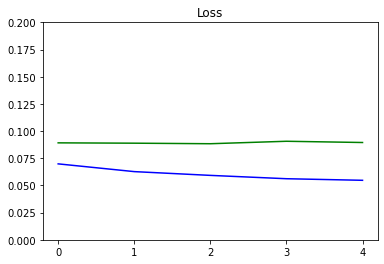

In [40]:
def plot_metrics(train_metric, val_metric, metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.plot(train_metric,color='blue',label=metric_name)
    plt.plot(val_metric,color='green',label='val_' + metric_name)

plot_metrics(epochs_train_losses, epochs_val_losses, "Loss", "Loss", ylim=0.2)

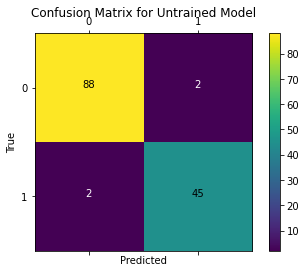

In [41]:
test_outputs = model(norm_test_X.values)
plot_confusion_matrix(test_Y.values, tf.round(test_outputs), title='Confusion Matrix for Untrained Model')